In [85]:
from google.colab import drive
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

drive.mount('/content/drive')
pd.set_option('display.precision', 2)
pd.set_option('display.float_format', lambda x: '%.2f' % x)
properties = pd.read_csv('/content/drive/MyDrive/Inmersion de Datos - Python/inmuebles_bogota.csv')
properties = properties.rename(columns = {'Área':'Area','Baños':'Banos'})
price = properties.Valor.str.split(expand=True)
properties['Currency'] = price[0]
properties['Price'] = price[1]
properties.Price = properties.Price.str.replace('.','',regex = True).astype('float')
properties['Price_M'] = properties.Price / 1000000
properties['Price_M2_Million'] = properties.Price_M / properties.Area
sum_data_properties = properties.groupby('Barrio').sum()
price_m2_neighborhood = sum_data_properties.Price_M / sum_data_properties.Area
properties['price_m2_neighborhood'] = properties.Barrio
properties['price_m2_neighborhood'] = properties['price_m2_neighborhood'].map(dict(price_m2_neighborhood))

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [86]:
dane_data = pd.read_csv('/content/drive/MyDrive/Inmersion de Datos - Python/datos_dane.csv')
dane_data.head()

,DIRECTORIO,NOMBRE_LOCALIDAD,NOMBRE_ESTRATO,NVCBP4,NVCBP14A,NVCBP14D,NVCBP14E,NVCBP14G,NVCBP15A,NVCBP15C,...,NHCLP5,NHCLP8AB,NHCLP8AE,NHCLP10,NHCLP11,NHCLP29_1A,NHCLP29_1C,NHCLP29_1E,NHCLP29_1F,NPCHP4
0,3004368.00,Usaquén,USAQUÉN: Paseo de Los Libertadores + La Uribe,1,2,2,2,2,2,2,...,1,NaN,NaN,2,2,NaN,NaN,NaN,NaN,9.00
1,3004369.00,Usaquén,Usaquén,1,2,2,2,2,2,2,...,2,NaN,NaN,3,2,NaN,NaN,NaN,NaN,11.00
2,3004375.00,Chapinero,CHAPINERO: Pardo Rubio + Chapinero,2,2,2,2,2,2,1,...,2,NaN,NaN,2,2,NaN,NaN,1.00,NaN,11.00
3,3004380.00,Usaquén,Los Cedros,1,2,2,2,2,2,2,...,1,NaN,NaN,3,2,NaN,NaN,NaN,NaN,9.00
4,3004383.00,Fontibón,Ciudad Salitre Occidental,1,2,2,2,2,1,2,...,2,NaN,NaN,2,2,NaN,NaN,NaN,NaN,11.00


In [87]:
dic_dane = {
       'NVCBP4':'CONJUNTO_CERRADO',
       'NVCBP14A':'FABRICAS_CERCA', 'NVCBP14D':'TERMINALES_BUS', 'NVCBP14E':'BARES_DISCO', 
       'NVCBP14G':'OSCURO_PELIGROSO', 'NVCBP15A':'RUIDO', 'NVCBP15C':'INSEGURIDAD',
       'NVCBP15F':'BASURA_INADECUADA', 'NVCBP15G':'INVASION','NVCBP16A3':'MOV_ADULTOS_MAYORES', 
       'NVCBP16A4':'MOV_NINOS_BEBES',
       'NPCKP17':'OCUPACION','NPCKP18':'CONTRATO','NPCKP23':'SALARIO_MES', 
       'NPCKP44A':'DONDE_TRABAJA', 'NPCKPN62A':'DECLARACION_RENTA', 
       'NPCKPN62B':'VALOR_DECLARACION', 'NPCKP64A':'PERDIDA_TRABAJO_C19', 
       'NPCKP64E':'PERDIDA_INGRESOS_C19',
       'NHCCP3':'TIENE_ESCRITURA', 'NHCCP6':'ANO_COMPRA', 'NHCCP7':'VALOR_COMPRA', 'NHCCP8_1':'HIPOTECA_CRED_BANCO',
       'NHCCP8_2':'OTRO_CRED_BANCO', 'NHCCP8_3':'CRED_FNA', 'NHCCP8_6':'PRESTAMOS_AMIGOS',
       'NHCCP8_7':'CESANTIAS', 'NHCCP8_8':'AHORROS', 'NHCCP8_9':'SUBSIDIOS',
       'NHCCP9':'CUANTO_PAGARIA_MENSUAL', 'NHCCP11':'PLANES_ADQUIRIR_VIVIENDA', 
       'NHCCP11A':'MOTIVO_COMPRA', 'NHCCP12':'RAZON_NO_ADQ_VIV', 'NHCCP41':'TIENE_CARRO','NHCCP41A':'CUANTOS_CARROS',
       'NHCCP47A':'TIENE_PERROS', 'NHCCP47B':'TIENE_GATOS', 'NHCLP2A':'VICTIMA_ATRACO', 'NHCLP2B':'VICTIMA_HOMICIDIO', 
       'NHCLP2C':'VICTIMA_PERSECUSION',
       'NHCLP2E':'VICTIMA_ACOSO', 'NHCLP4':'COMO_VIVE_ECON', 'NHCLP5':'COMO_NIVEL_VIDA', 
       'NHCLP8AB':'REACCION_OPORTUNA_POLICIA', 'NHCLP8AE':'COMO_TRANSPORTE_URBANO', 'NHCLP10':'SON_INGRESOS_SUFICIENTES',
       'NHCLP11':'SE_CONSIDERA_POBRE', 'NHCLP29_1A':'MED_C19_TRABAJO', 
       'NHCLP29_1C':'MED_C19_CAMBIO_VIVIENDA', 'NHCLP29_1E':'MED_C19_ENDEUDAMIENTO', 
       'NHCLP29_1F':'MED_C19_VENTA_BIENES','NPCHP4':'NIVEL_EDUCATIVO'
       }

dane_data = dane_data.rename(columns=dic_dane)
dane_data.columns

Index(['DIRECTORIO', 'NOMBRE_LOCALIDAD', 'NOMBRE_ESTRATO', 'CONJUNTO_CERRADO',
       'FABRICAS_CERCA', 'TERMINALES_BUS', 'BARES_DISCO', 'OSCURO_PELIGROSO',
       'RUIDO', 'INSEGURIDAD', 'BASURA_INADECUADA', 'INVASION',
       'MOV_ADULTOS_MAYORES', 'MOV_NINOS_BEBES', 'OCUPACION', 'CONTRATO',
       'SALARIO_MES', 'DONDE_TRABAJA', 'DECLARACION_RENTA',
       'VALOR_DECLARACION', 'PERDIDA_TRABAJO_C19', 'PERDIDA_INGRESOS_C19',
       'TIENE_ESCRITURA', 'ANO_COMPRA', 'VALOR_COMPRA', 'HIPOTECA_CRED_BANCO',
       'OTRO_CRED_BANCO', 'CRED_FNA', 'PRESTAMOS_AMIGOS', 'CESANTIAS',
       'AHORROS', 'SUBSIDIOS', 'CUANTO_PAGARIA_MENSUAL',
       'PLANES_ADQUIRIR_VIVIENDA', 'MOTIVO_COMPRA', 'RAZON_NO_ADQ_VIV',
       'TIENE_CARRO', 'CUANTOS_CARROS', 'TIENE_PERROS', 'TIENE_GATOS',
       'VICTIMA_ATRACO', 'VICTIMA_HOMICIDIO', 'VICTIMA_PERSECUSION',
       'VICTIMA_ACOSO', 'COMO_VIVE_ECON', 'COMO_NIVEL_VIDA',
       'REACCION_OPORTUNA_POLICIA', 'COMO_TRANSPORTE_URBANO',
       'SON_INGRESOS_SUFICIE

In [88]:
#Current answers 1->Yes ; 2->No ==> We will use 0 instead 2 for negative answer
dane_data = dane_data[['NOMBRE_ESTRATO','CONJUNTO_CERRADO','INSEGURIDAD','TERMINALES_BUS','BARES_DISCO','RUIDO','OSCURO_PELIGROSO','SALARIO_MES','TIENE_ESCRITURA','PERDIDA_TRABAJO_C19','PERDIDA_INGRESOS_C19','PLANES_ADQUIRIR_VIVIENDA']].replace(2,0)
dane_data

,NOMBRE_ESTRATO,CONJUNTO_CERRADO,INSEGURIDAD,TERMINALES_BUS,BARES_DISCO,RUIDO,OSCURO_PELIGROSO,SALARIO_MES,TIENE_ESCRITURA,PERDIDA_TRABAJO_C19,PERDIDA_INGRESOS_C19,PLANES_ADQUIRIR_VIVIENDA
0,USAQUÉN: Paseo de Los Libertadores + La Uribe,1,0,0,0,0,0,99.00,1.00,0,0,0
1,Usaquén,1,0,0,0,0,0,10000000.00,1.00,0,0,0
2,CHAPINERO: Pardo Rubio + Chapinero,0,1,0,0,0,0,4000000.00,1.00,0,1,0
3,Los Cedros,1,0,0,0,0,0,5000000.00,1.00,0,1,0
4,Ciudad Salitre Occidental,1,0,0,0,1,0,3500000.00,1.00,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
9852,SANTA FE: Las Nieves + Sagrado Corazón,1,1,0,0,1,0,6000000.00,1.00,0,0,0
9853,SANTA FE: Las Nieves + Sagrado Corazón,0,1,0,1,1,0,1800000.00,1.00,0,0,0
9854,SANTA FE: Las Nieves + Sagrado Corazón,1,0,0,0,0,0,7200000.00,1.00,0,0,0
9855,SANTA FE: Las Nieves + Sagrado Corazón,1,0,0,0,0,0,99.00,1.00,0,1,0


In [89]:
dane_data_avg = dane_data.groupby('NOMBRE_ESTRATO')[['CONJUNTO_CERRADO','INSEGURIDAD','TERMINALES_BUS','BARES_DISCO','RUIDO','OSCURO_PELIGROSO','SALARIO_MES','TIENE_ESCRITURA','PERDIDA_TRABAJO_C19','PERDIDA_INGRESOS_C19','PLANES_ADQUIRIR_VIVIENDA']].mean()
dane_data_avg


,CONJUNTO_CERRADO,INSEGURIDAD,TERMINALES_BUS,BARES_DISCO,RUIDO,OSCURO_PELIGROSO,SALARIO_MES,TIENE_ESCRITURA,PERDIDA_TRABAJO_C19,PERDIDA_INGRESOS_C19,PLANES_ADQUIRIR_VIVIENDA
NOMBRE_ESTRATO,,,,,,,,,,,
20 de Julio,0.11,0.81,0.15,0.11,0.44,0.16,1493859.61,0.84,0.08,0.32,0.20
Américas,0.62,0.75,0.02,0.21,0.39,0.08,2672138.14,0.94,0.03,0.28,0.15
Apogeo,0.35,0.70,0.25,0.06,0.32,0.00,1837583.18,0.92,0.08,0.35,0.08
Arborizadora,0.57,0.70,0.05,0.12,0.31,0.16,1802296.76,0.97,0.12,0.39,0.18
BARRIOS UNIDOS: Parque Salitre + Doce de Octubre,0.63,0.67,0.01,0.02,0.30,0.13,2943730.73,0.95,0.05,0.30,0.06
...,...,...,...,...,...,...,...,...,...,...,...
Usaquén,0.90,0.22,0.01,0.03,0.20,0.01,4670896.88,0.97,0.02,0.17,0.12
Venecia,0.47,0.82,0.24,0.29,0.50,0.36,2078712.71,0.83,0.14,0.40,0.25
Verbenal,0.77,0.56,0.08,0.03,0.25,0.14,2445403.14,0.87,0.03,0.27,0.09


#Some conclusions:

*   81% of residents of the 20 de Julio neighborhood believe the neighborhood is unsafe

*   8% of people in the 20 de Julio neighborhood lost their jobs during Covid 19




In [90]:
 properties_extended = pd.merge(properties, dane_data_avg, left_on='UPZ', right_on='NOMBRE_ESTRATO', how='left')
 properties_extended

,Tipo,Descripcion,Habitaciones,Banos,Area,Barrio,UPZ,Valor,Currency,Price,...,INSEGURIDAD,TERMINALES_BUS,BARES_DISCO,RUIDO,OSCURO_PELIGROSO,SALARIO_MES,TIENE_ESCRITURA,PERDIDA_TRABAJO_C19,PERDIDA_INGRESOS_C19,PLANES_ADQUIRIR_VIVIENDA
0,Apartamento,Apartamento en venta en Zona Noroccidental,3,2,70,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,$ 360.000.000,$,360000000.00,...,0.52,0.01,0.23,0.35,0.13,4034787.96,0.90,0.04,0.28,0.09
1,Casa,Casa en venta en Castilla,4,3,170,Castilla,KENNEDY: Castilla + Bavaria,$ 670.000.000,$,670000000.00,...,0.58,0.12,0.11,0.34,0.13,2794784.29,0.94,0.09,0.30,0.18
2,Apartamento,Apartamento en venta en Chico Reservado,3,3,144,Chico Reservado,CHAPINERO: Chicó Lago + El Refugio,$ 1.120.000.000,$,1120000000.00,...,0.22,0.00,0.05,0.19,0.02,5512355.76,0.88,0.03,0.19,0.07
3,Apartamento,Apartamento en venta en Usaquén,3,2,154,Usaquén,Usaquén,$ 890.000.000,$,890000000.00,...,0.22,0.01,0.03,0.20,0.01,4670896.88,0.97,0.02,0.17,0.12
4,Apartamento,Apartamento en venta en Bella Suiza,2,3,128,Bella Suiza,USAQUÉN: Country Club + Santa Bárbara,$ 970.000.000,$,970000000.00,...,0.42,0.00,0.02,0.27,0.01,4832842.64,0.96,0.02,0.16,0.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9515,Apartamento,Apartamento en venta en Kennedy,3,2,70,Kennedy,Kennedy Central,$ 290.000.000,$,290000000.00,...,0.61,0.03,0.17,0.43,0.09,2144185.60,0.91,0.07,0.26,0.19
9516,Apartamento,Apartamento en venta en Parque Central Bavaria,2,2,100,Parque Central Bavaria,SANTA FE: Las Nieves + Sagrado Corazón,$ 670.000.000,$,670000000.00,...,0.49,0.02,0.15,0.42,0.09,4177178.77,0.93,0.02,0.12,0.07
9517,Local,Local en venta en Restrepo,8,6,383,Restrepo,Restrepo,$ 900.000.000,$,900000000.00,...,0.71,0.03,0.17,0.47,0.26,2356994.56,0.90,0.05,0.22,0.21
9518,Casa,Casa en venta en Engativa,3,2,183,Engativa,Engativá,$ 335.000.000,$,335000000.00,...,0.87,0.02,0.11,0.54,0.13,1418652.63,0.85,0.02,0.39,0.07


In [91]:
properties_extended.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9520 entries, 0 to 9519
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Tipo                      9520 non-null   object 
 1   Descripcion               9520 non-null   object 
 2   Habitaciones              9520 non-null   int64  
 3   Banos                     9520 non-null   int64  
 4   Area                      9520 non-null   int64  
 5   Barrio                    9520 non-null   object 
 6   UPZ                       9478 non-null   object 
 7   Valor                     9520 non-null   object 
 8   Currency                  9520 non-null   object 
 9   Price                     9520 non-null   float64
 10  Price_M                   9520 non-null   float64
 11  Price_M2_Million          9520 non-null   float64
 12  price_m2_neighborhood     9520 non-null   float64
 13  CONJUNTO_CERRADO          9366 non-null   float64
 14  INSEGURI

In [92]:
upz = pd.read_csv('/content/drive/MyDrive/Inmersion de Datos - Python/cod_upz.csv')
upz

,NOMBRE_ESTRATO,COD_UPZ_GRUPO
0,SANTA FE: Las Nieves + Sagrado Corazón,814.00
1,Santa Isabel,37.00
2,USAQUÉN: Country Club + Santa Bárbara,803.00
3,CHAPINERO: Pardo Rubio + Chapinero,816.00
4,Ciudad Salitre Occidental,110.00
...,...,...
90,Verbenal,9.00
91,Casa Blanca Suba,23.00
92,El Prado,19.00
93,Muzú,41.00


In [93]:
#Inner join because we need just all properties with a UPZ code, avoid nulls
properties_extended = pd.merge(properties_extended, upz, left_on='UPZ', right_on='NOMBRE_ESTRATO', how='inner')
properties_extended

,Tipo,Descripcion,Habitaciones,Banos,Area,Barrio,UPZ,Valor,Currency,Price,...,BARES_DISCO,RUIDO,OSCURO_PELIGROSO,SALARIO_MES,TIENE_ESCRITURA,PERDIDA_TRABAJO_C19,PERDIDA_INGRESOS_C19,PLANES_ADQUIRIR_VIVIENDA,NOMBRE_ESTRATO,COD_UPZ_GRUPO
0,Apartamento,Apartamento en venta en Zona Noroccidental,3,2,70,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,$ 360.000.000,$,360000000.00,...,0.23,0.35,0.13,4034787.96,0.90,0.04,0.28,0.09,CHAPINERO: Pardo Rubio + Chapinero,816.00
1,Casa,Casa en venta en Marly,3,3,147,Marly,CHAPINERO: Pardo Rubio + Chapinero,$ 300.000.000,$,300000000.00,...,0.23,0.35,0.13,4034787.96,0.90,0.04,0.28,0.09,CHAPINERO: Pardo Rubio + Chapinero,816.00
2,Casa,Casa en venta en Zona Noroccidental,3,4,300,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,$ 2.519.000.000,$,2519000000.00,...,0.23,0.35,0.13,4034787.96,0.90,0.04,0.28,0.09,CHAPINERO: Pardo Rubio + Chapinero,816.00
3,Apartamento,Apartamento en venta en Zona Noroccidental,2,1,45,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,$ 239.000.000,$,239000000.00,...,0.23,0.35,0.13,4034787.96,0.90,0.04,0.28,0.09,CHAPINERO: Pardo Rubio + Chapinero,816.00
4,Casa,Casa en venta en Zona Noroccidental,3,6,380,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,$ 1.600.000.000,$,1600000000.00,...,0.23,0.35,0.13,4034787.96,0.90,0.04,0.28,0.09,CHAPINERO: Pardo Rubio + Chapinero,816.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9313,Apartamento,Apartamento en venta en Verbenal,2,2,48,Verbenal,Verbenal,$ 250.000.000,$,250000000.00,...,0.03,0.25,0.14,2445403.14,0.87,0.03,0.27,0.09,Verbenal,9.00
9314,Apartamento,Apartamento en venta en Verbenal,2,1,38,Verbenal,Verbenal,$ 180.000.000,$,180000000.00,...,0.03,0.25,0.14,2445403.14,0.87,0.03,0.27,0.09,Verbenal,9.00
9315,Apartamento,Apartamento en venta en Verbenal,2,1,38,Verbenal,Verbenal,$ 180.000.000,$,180000000.00,...,0.03,0.25,0.14,2445403.14,0.87,0.03,0.27,0.09,Verbenal,9.00
9316,Apartamento,Apartamento en venta en Verbenal,2,1,48,Verbenal,Verbenal,$ 240.000.000,$,240000000.00,...,0.03,0.25,0.14,2445403.14,0.87,0.03,0.27,0.09,Verbenal,9.00


In [94]:
#Before inner join we had 9520 properties, after inner join we have 9318 properties
properties_extended.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9318 entries, 0 to 9317
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Tipo                      9318 non-null   object 
 1   Descripcion               9318 non-null   object 
 2   Habitaciones              9318 non-null   int64  
 3   Banos                     9318 non-null   int64  
 4   Area                      9318 non-null   int64  
 5   Barrio                    9318 non-null   object 
 6   UPZ                       9318 non-null   object 
 7   Valor                     9318 non-null   object 
 8   Currency                  9318 non-null   object 
 9   Price                     9318 non-null   float64
 10  Price_M                   9318 non-null   float64
 11  Price_M2_Million          9318 non-null   float64
 12  price_m2_neighborhood     9318 non-null   float64
 13  CONJUNTO_CERRADO          9318 non-null   float64
 14  INSEGURI

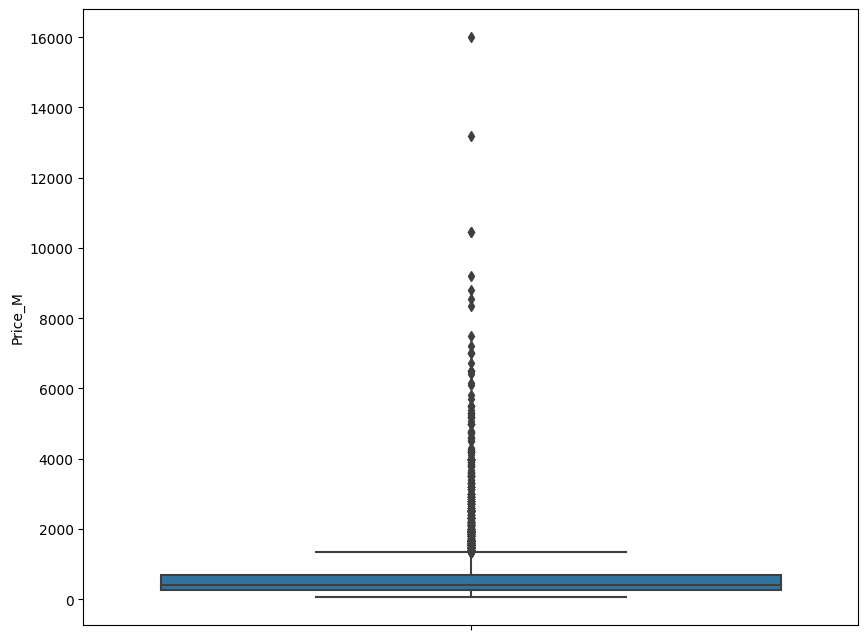

In [95]:
plt.figure(figsize=(10,8))
sns.boxplot(data=properties_extended, y='Price_M')
plt.show()

In [96]:
#Detect outliers
properties_extended.query('Price_M > 5000 | Price_M < 60')

,Tipo,Descripcion,Habitaciones,Banos,Area,Barrio,UPZ,Valor,Currency,Price,...,BARES_DISCO,RUIDO,OSCURO_PELIGROSO,SALARIO_MES,TIENE_ESCRITURA,PERDIDA_TRABAJO_C19,PERDIDA_INGRESOS_C19,PLANES_ADQUIRIR_VIVIENDA,NOMBRE_ESTRATO,COD_UPZ_GRUPO
207,Apartamento,Apartamento en venta en Chapinero,3,5,476,Chapinero,CHAPINERO: Pardo Rubio + Chapinero,$ 8.550.000.000,$,8550000000.00,...,0.23,0.35,0.13,4034787.96,0.90,0.04,0.28,0.09,CHAPINERO: Pardo Rubio + Chapinero,816.00
323,Local,Local en venta en Chapinero,16,9,650,Chapinero,CHAPINERO: Pardo Rubio + Chapinero,$ 5.800.000.000,$,5800000000.00,...,0.23,0.35,0.13,4034787.96,0.90,0.04,0.28,0.09,CHAPINERO: Pardo Rubio + Chapinero,816.00
702,Casa,Casa en venta en Chapinero,4,4,462,Chapinero,CHAPINERO: Pardo Rubio + Chapinero,$ 5.200.000.000,$,5200000000.00,...,0.23,0.35,0.13,4034787.96,0.90,0.04,0.28,0.09,CHAPINERO: Pardo Rubio + Chapinero,816.00
708,Casa,Casa en venta en Chapinero,12,2,769,Chapinero,CHAPINERO: Pardo Rubio + Chapinero,$ 6.160.000.000,$,6160000000.00,...,0.23,0.35,0.13,4034787.96,0.90,0.04,0.28,0.09,CHAPINERO: Pardo Rubio + Chapinero,816.00
829,Apartamento,Apartamento en venta en Zona Noroccidental,4,7,550,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,$ 7.200.000.000,$,7200000000.00,...,0.23,0.35,0.13,4034787.96,0.90,0.04,0.28,0.09,CHAPINERO: Pardo Rubio + Chapinero,816.00
1371,Apartamento,Apartamento en venta en El Chicó,4,5,555,El Chicó,CHAPINERO: Chicó Lago + El Refugio,$ 6.100.000.000,$,6100000000.00,...,0.05,0.19,0.02,5512355.76,0.88,0.03,0.19,0.07,CHAPINERO: Chicó Lago + El Refugio,817.00
1414,Apartamento,Apartamento en venta en El Chicó,3,5,1550,El Chicó,CHAPINERO: Chicó Lago + El Refugio,$ 13.200.000.000,$,13200000000.00,...,0.05,0.19,0.02,5512355.76,0.88,0.03,0.19,0.07,CHAPINERO: Chicó Lago + El Refugio,817.00
1429,Local,Local en venta en Quinta Camacho,16,9,1050,Quinta Camacho,CHAPINERO: Chicó Lago + El Refugio,$ 5.299.999.744,$,5299999744.00,...,0.05,0.19,0.02,5512355.76,0.88,0.03,0.19,0.07,CHAPINERO: Chicó Lago + El Refugio,817.00
1442,Local,Local en venta en Quinta Camacho,16,9,1050,Quinta Camacho,CHAPINERO: Chicó Lago + El Refugio,$ 5.299.999.744,$,5299999744.00,...,0.05,0.19,0.02,5512355.76,0.88,0.03,0.19,0.07,CHAPINERO: Chicó Lago + El Refugio,817.00
1518,Apartamento,Apartamento en venta en Chico Reservado,4,5,378,Chico Reservado,CHAPINERO: Chicó Lago + El Refugio,$ 6.500.000.000,$,6500000000.00,...,0.05,0.19,0.02,5512355.76,0.88,0.03,0.19,0.07,CHAPINERO: Chicó Lago + El Refugio,817.00


In [97]:
#Clean 36 outliers
properties_extended = properties_extended.query('Price_M < 5000 & Price_M > 60')
properties_extended

,Tipo,Descripcion,Habitaciones,Banos,Area,Barrio,UPZ,Valor,Currency,Price,...,BARES_DISCO,RUIDO,OSCURO_PELIGROSO,SALARIO_MES,TIENE_ESCRITURA,PERDIDA_TRABAJO_C19,PERDIDA_INGRESOS_C19,PLANES_ADQUIRIR_VIVIENDA,NOMBRE_ESTRATO,COD_UPZ_GRUPO
0,Apartamento,Apartamento en venta en Zona Noroccidental,3,2,70,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,$ 360.000.000,$,360000000.00,...,0.23,0.35,0.13,4034787.96,0.90,0.04,0.28,0.09,CHAPINERO: Pardo Rubio + Chapinero,816.00
1,Casa,Casa en venta en Marly,3,3,147,Marly,CHAPINERO: Pardo Rubio + Chapinero,$ 300.000.000,$,300000000.00,...,0.23,0.35,0.13,4034787.96,0.90,0.04,0.28,0.09,CHAPINERO: Pardo Rubio + Chapinero,816.00
2,Casa,Casa en venta en Zona Noroccidental,3,4,300,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,$ 2.519.000.000,$,2519000000.00,...,0.23,0.35,0.13,4034787.96,0.90,0.04,0.28,0.09,CHAPINERO: Pardo Rubio + Chapinero,816.00
3,Apartamento,Apartamento en venta en Zona Noroccidental,2,1,45,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,$ 239.000.000,$,239000000.00,...,0.23,0.35,0.13,4034787.96,0.90,0.04,0.28,0.09,CHAPINERO: Pardo Rubio + Chapinero,816.00
4,Casa,Casa en venta en Zona Noroccidental,3,6,380,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,$ 1.600.000.000,$,1600000000.00,...,0.23,0.35,0.13,4034787.96,0.90,0.04,0.28,0.09,CHAPINERO: Pardo Rubio + Chapinero,816.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9313,Apartamento,Apartamento en venta en Verbenal,2,2,48,Verbenal,Verbenal,$ 250.000.000,$,250000000.00,...,0.03,0.25,0.14,2445403.14,0.87,0.03,0.27,0.09,Verbenal,9.00
9314,Apartamento,Apartamento en venta en Verbenal,2,1,38,Verbenal,Verbenal,$ 180.000.000,$,180000000.00,...,0.03,0.25,0.14,2445403.14,0.87,0.03,0.27,0.09,Verbenal,9.00
9315,Apartamento,Apartamento en venta en Verbenal,2,1,38,Verbenal,Verbenal,$ 180.000.000,$,180000000.00,...,0.03,0.25,0.14,2445403.14,0.87,0.03,0.27,0.09,Verbenal,9.00
9316,Apartamento,Apartamento en venta en Verbenal,2,1,48,Verbenal,Verbenal,$ 240.000.000,$,240000000.00,...,0.03,0.25,0.14,2445403.14,0.87,0.03,0.27,0.09,Verbenal,9.00


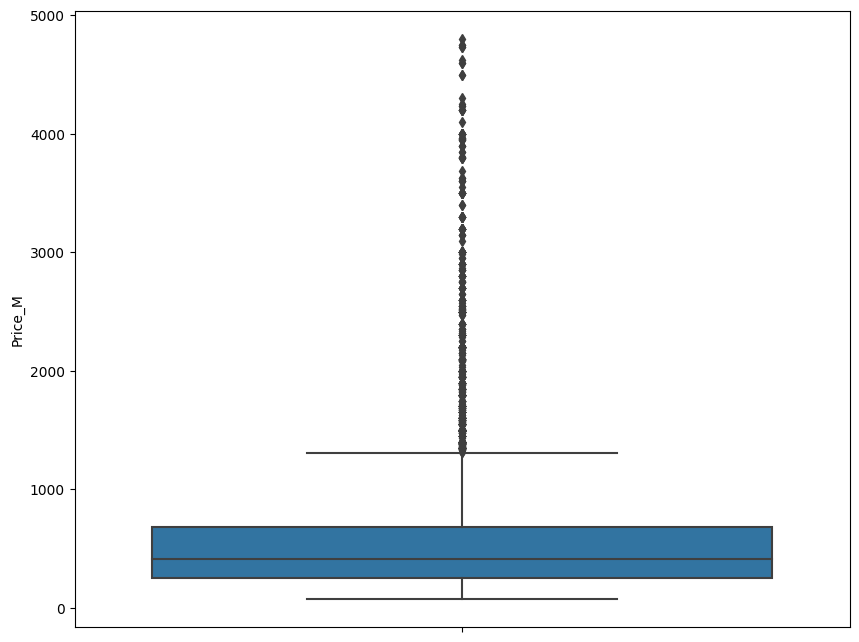

In [98]:
plt.figure(figsize=(10,8))
sns.boxplot(data=properties_extended, y='Price_M')
plt.show()

In [99]:
properties_extended['annual_income_million'] = properties_extended.SALARIO_MES * 12 / 1000000
properties_extended['annual_income_million']

<ipython-input-99-2656274dd63b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  properties_extended['annual_income_million'] = properties_extended.SALARIO_MES * 12 / 1000000


0      48.42
1      48.42
2      48.42
3      48.42
4      48.42
        ... 
9313   29.34
9314   29.34
9315   29.34
9316   29.34
9317   29.34
Name: annual_income_million, Length: 9277, dtype: float64

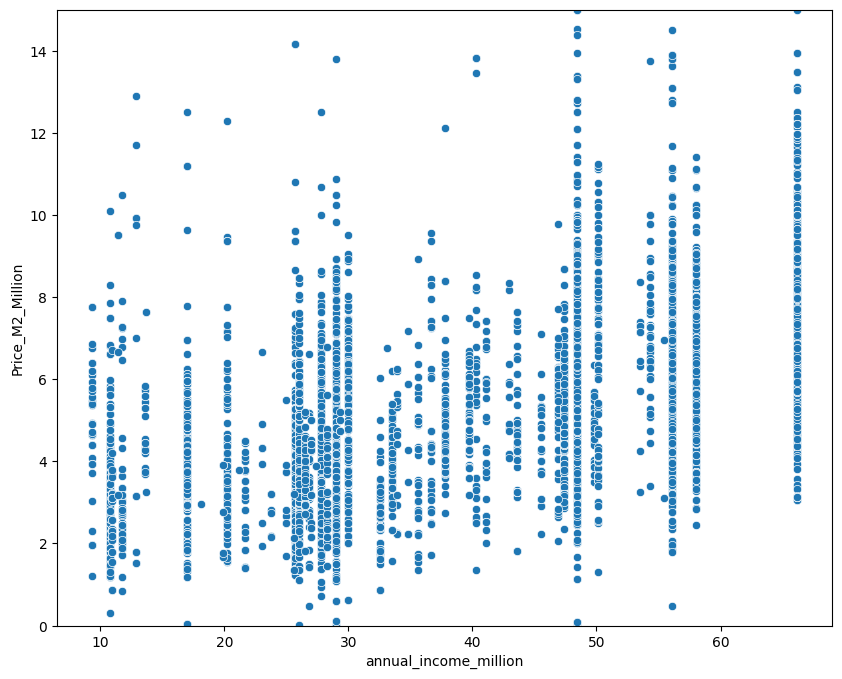

In [100]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=properties_extended, x='annual_income_million', y='Price_M2_Million')
plt.ylim((0,15))
plt.show()

# Some conclusions

In principle, we can say that the annual salary of people does not have much relation with the price of the square metre of real estate in the UPZ. The graph is very scattered

In [101]:
#With the corr() function we can see how related one variable is to another.
properties_extended.corr()

,Habitaciones,Banos,Area,Price,Price_M,Price_M2_Million,price_m2_neighborhood,CONJUNTO_CERRADO,INSEGURIDAD,TERMINALES_BUS,BARES_DISCO,RUIDO,OSCURO_PELIGROSO,SALARIO_MES,TIENE_ESCRITURA,PERDIDA_TRABAJO_C19,PERDIDA_INGRESOS_C19,PLANES_ADQUIRIR_VIVIENDA,COD_UPZ_GRUPO,annual_income_million
Habitaciones,1.00,0.48,0.03,0.22,0.22,-0.23,-0.18,-0.11,0.12,0.06,0.11,0.13,0.10,-0.15,-0.06,0.06,0.11,0.07,-0.09,-0.15
Banos,0.48,1.00,0.06,0.65,0.65,0.08,0.16,0.16,-0.19,-0.16,-0.08,-0.18,-0.20,0.20,0.12,-0.09,-0.15,-0.10,0.07,0.20
Area,0.03,0.06,1.00,0.05,0.05,-0.04,-0.03,-0.01,-0.01,-0.01,-0.01,-0.00,0.01,-0.00,-0.01,0.01,0.01,0.01,-0.00,-0.00
Price,0.22,0.65,0.05,1.00,1.00,0.41,0.32,0.21,-0.26,-0.18,-0.09,-0.25,-0.23,0.32,0.11,-0.13,-0.22,-0.17,0.20,0.32
Price_M,0.22,0.65,0.05,1.00,1.00,0.41,0.32,0.21,-0.26,-0.18,-0.09,-0.25,-0.23,0.32,0.11,-0.13,-0.22,-0.17,0.20,0.32
Price_M2_Million,-0.23,0.08,-0.04,0.41,0.41,1.00,0.50,0.32,-0.37,-0.27,-0.19,-0.36,-0.33,0.46,0.20,-0.20,-0.35,-0.22,0.27,0.46
price_m2_neighborhood,-0.18,0.16,-0.03,0.32,0.32,0.50,1.00,0.64,-0.66,-0.37,-0.41,-0.66,-0.59,0.82,0.37,-0.31,-0.64,-0.25,0.41,0.82
CONJUNTO_CERRADO,-0.11,0.16,-0.01,0.21,0.21,0.32,0.64,1.00,-0.84,-0.29,-0.51,-0.70,-0.66,0.80,0.60,-0.35,-0.78,0.04,0.09,0.80
INSEGURIDAD,0.12,-0.19,-0.01,-0.26,-0.26,-0.37,-0.66,-0.84,1.00,0.50,0.60,0.85,0.75,-0.81,-0.54,0.30,0.74,0.10,-0.01,-0.81
TERMINALES_BUS,0.06,-0.16,-0.01,-0.18,-0.18,-0.27,-0.37,-0.29,0.50,1.00,0.38,0.66,0.57,-0.52,-0.29,0.18,0.35,0.26,-0.11,-0.52


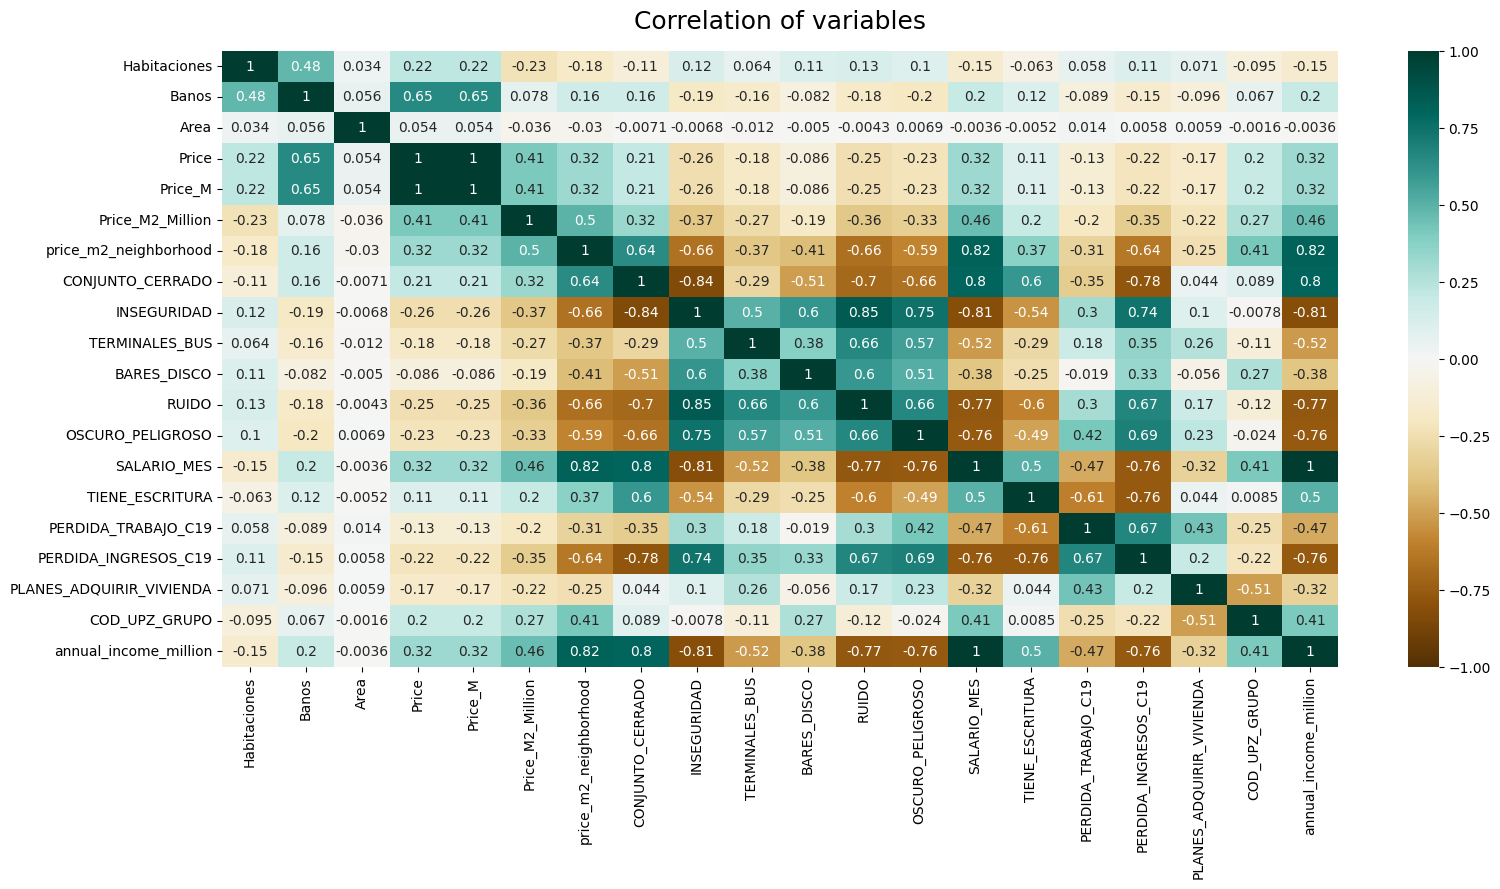

In [102]:
plt.figure(figsize=(18, 8))
heatmap = sns.heatmap(properties_extended.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation of variables', fontdict={'fontsize':18}, pad=16);

## **Machine Learning**

https://scikit-learn.org/stable/

In [103]:
#With Linear regression we can predict numeric values

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X = properties_extended[['COD_UPZ_GRUPO']]
y = properties_extended[['Price_M']]

#With random_state the algorithm return the same result, is a seed
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=99)

X_train

,COD_UPZ_GRUPO
7578,810.00
8345,98.00
1246,816.00
8491,809.00
4602,47.00
...,...
5223,19.00
7929,85.00
1784,817.00
3268,14.00


In [104]:
X_test

,COD_UPZ_GRUPO
8428,809.00
3079,14.00
6927,75.00
6861,75.00
2357,14.00
...,...
7777,85.00
1423,817.00
3916,803.00
8305,98.00


In [105]:
model = LinearRegression()
model.fit(X_train,y_train)
y_predict_result = model.predict(X_test)

## **Estimator measures**

In [106]:
#mean-squared: 
#The median absolute error is particularly interesting because it is robust to 
#outliers. The loss is calculated by taking the median of all absolute 
#differences between the target and the prediction.

from sklearn.metrics import mean_absolute_error, r2_score
baseline_mae = mean_absolute_error(y_test, y_predict_result)
baseline_mae

349.01934464671155

This means that the error of the property price will be +- 349 M is very bad.

----

In [107]:
#R-squared (R2)
#is a statistical measure that represents the proportion of the variance for a
#dependent variable that's explained by an independent variable or variables in
#a regression model.

baseline_r2 = r2_score(y_test, y_predict_result)
baseline_r2

0.025479229587150987

This is a bad result, we have to try to get our baseline to a value close to 1.

____

In [108]:
#We will try to improve the training results adding more data to the model
X = properties_extended[['COD_UPZ_GRUPO', 'Habitaciones', 'Banos', 'CONJUNTO_CERRADO']]
y = properties_extended[['Price_M']]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=99)
model = LinearRegression()
model.fit(X_train,y_train)
y_predict_result = model.predict(X_test)
baseline_mae = mean_absolute_error(y_test, y_predict_result)
baseline_r2 = r2_score(y_test, y_predict_result)

print(baseline_mae, baseline_r2)


241.65208565247354 0.41035781689552253


We notice an improvement, but it is not enough, so we will remove more outliers

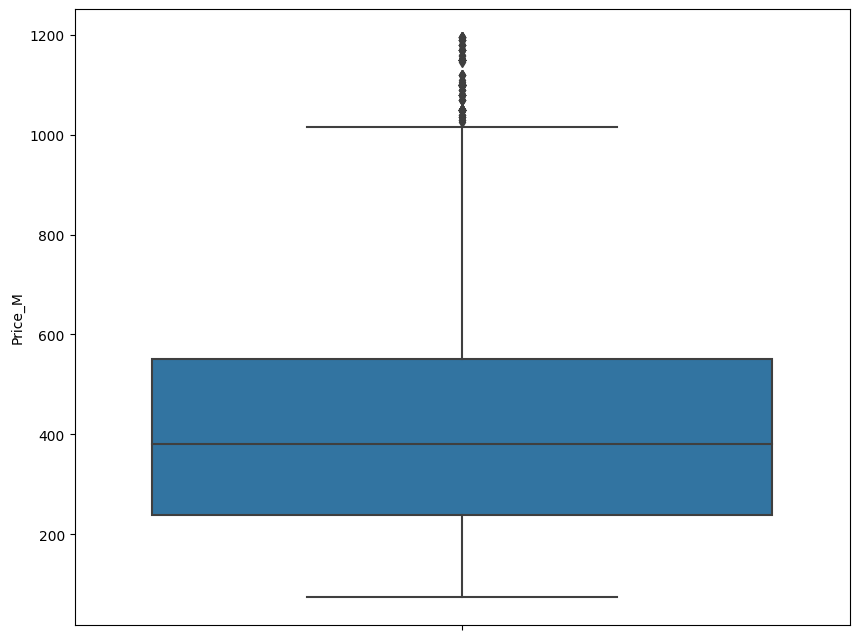

In [115]:
properties_extended = properties_extended.query('Price_M < 1200 & Price_M > 60')
plt.figure(figsize=(10,8))
sns.boxplot(data=properties_extended, y= 'Price_M')
plt.show()

In [117]:
X = properties_extended[['COD_UPZ_GRUPO', 'Habitaciones', 'Banos', 'CONJUNTO_CERRADO','annual_income_million','TIENE_ESCRITURA']]
y = properties_extended[['Price_M']]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=99)
model = LinearRegression()
model.fit(X_train,y_train)
y_predict_result = model.predict(X_test)
baseline_mae = mean_absolute_error(y_test, y_predict_result)
baseline_r2 = r2_score(y_test, y_predict_result)

print(baseline_mae, baseline_r2)

118.25967274431333 0.5404735562069192


We noticed a significant improvement after adding more variables and eliminating outliers.

Let's try to test the model for a particular case:



*  UPZ: 816
*  Habitaciones: 3
*  Banos: 2
*  Conjunto Cerrado: yes -> 1
*  Annual income: 50M
*  Tiene escritura: yes -> 1




In [118]:
model.predict([[816,3,2,1,50,1]])

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[434.21129691]])

The final prediction is that the property will cost about $434 million.